## Intersection Over Union (IOU)

The submissions in this competition are evaluated based on Intersection Over Union (IOU) metric. In this notebook, I will implement the function to calculate this metric for this competition.

If you have worked on object localization task you should have come across this metric as this is commonly used there. The formula to calculate IOU given coordinates of two bounding boxes is shown in the image below.

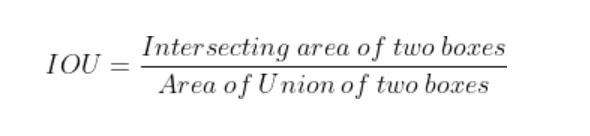

**Lets implement IOU for Object Localization task**

In [ ]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IOU for Object Localization task

Consider we have 2 bounding boxes, predicted and the actual with overlap as one of listed below.

1. Complete overlap.
2. Partial overlap.
3. No overlap.

In [ ]:
def get_iou(coords1, coords2):
    """ Computes Intersection Over Union
    
    Parameters
    __________
    coords1: list
            Coordinates of the predicted bb
    coords2: list
            Coordinates of the actual bb
            
    Returns
    _______
    IOU: double
        Overlap degree.
    """
    #coordinates of the intersection.
    x1 = max(coords1[0], coords2[0])
    y1 = max(coords1[1], coords2[1])
    x2 = min(coords1[2], coords2[2])
    y2 = min(coords1[3], coords2[3])
    
    #height and width of intersection area.
    height = x2 - x1
    width = y2 - y1
    int_area = height * width
    
    if height < 0 or width < 0:
        return 0 #no intersection.
    
    #caluclate area of two bb's
    #and subtract the area of intersection once to get union area.
    area1 = (coords1[2] - coords1[0]) * (coords1[3] - coords1[1])
    area2 = (coords2[2] - coords2[0]) * (coords2[3] - coords2[1])
    return (int_area)/(area1 + area2 - int_area)

#consider a dummy image of the size 800x800
DIM = 800
image = np.zeros((DIM, DIM))

bb_actual = [150, 150, 350, 350] #coordinates of actual bounding box.

#coordinates of predicted bounding boxes in 3 different examples.
bb_predicted1 = [150, 150, 350, 350] #complete intersection
bb_predicted2 = [100, 100, 300, 300] #partial intersection
bb_predicted3 = [400, 450, 600, 650] #no intersection

iou1 = round(get_iou(bb_predicted1, bb_actual), 2)
iou2 = round(get_iou(bb_predicted2, bb_actual), 2)
iou3 = round(get_iou(bb_predicted3, bb_actual), 2)

print(iou1, iou2, iou3)

#### Visualize the IOU's

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))

image = cv2.rectangle(image, (bb_actual[1], bb_actual[0]), (bb_actual[3], bb_actual[2]), (255, 255, 255), 1)

temp = image.copy()
temp = cv2.rectangle(temp, (bb_predicted1[1], bb_predicted1[0]), (bb_predicted1[3], bb_predicted1[2]), (255, 255, 255), 1)
axes[0].imshow(temp)
axes[0].title.set_text('Complete Overlap (IOU=1)')

temp = image.copy()
temp = cv2.rectangle(temp, (bb_predicted2[1], bb_predicted2[0]), (bb_predicted2[3], bb_predicted2[2]), (255, 255, 255), 1)
axes[1].imshow(temp)
axes[1].title.set_text('Partial Overlap (IOU=0.39(<1))')

temp = image.copy()
temp = cv2.rectangle(temp, (bb_predicted3[1], bb_predicted3[0]), (bb_predicted3[3], bb_predicted3[2]), (255, 255, 255), 1)
axes[2].imshow(temp)
axes[2].title.set_text('No Overlap (IOU=0)')

**Note: In the figure 1 there's only 1 square as predicted and actual bounding boxes are overlapping on one another.**

Now that we have an idea of how IOU is used in the Computer Vision, lets jump into the NLP part and see how its being used in this competition. For that let's have a look at the submission csv.

In [ ]:
sub_data = pd.read_csv('../input/foursquare-location-matching/sample_submission.csv')
sub_data.head()

**Matches** is the column that has to be predicted. Each entry in this column contains list ids of the locations that describes a common Point of Interest (POI) with the location under consideration. Location entries always self-match.

## How IOU is being used in the competition?

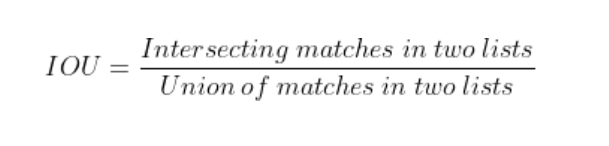

**The function below computes the IOU for two lists**

In [ ]:
def get_iou_list(lst1, lst2):
    """ Computes Intersection Over Union for two lists
    
    Parameters
    __________
    lst1: list
            Predicted location matches.
    lst2: list
            Actual location matches.
            
    Returns
    _______
    IOU: double
        Overlap degree.
    """
    set1, set2 = set(lst1), set(lst2)
    common_matches = set1.intersection(set2)
    unique_matches = set1.union(set2)
    return len(common_matches)/len(unique_matches)

actual_matches = ['E_001b6bad66eb98', 'E_0283d9f61e569d'] #coordinates of actual bounding box.

#coordinates of predicted bounding boxes in 3 different examples.
pred_matches1 = ['E_001b6bad66eb98', 'E_0283d9f61e569d'] #complete intersection
pred_matches2 = ['E_001b6bad66eb98', 'E_00001118ad0191'] #partial intersection
pred_matches3 = ['E_00001118ad0191'] #no intersection

iou1 = round(get_iou_list(pred_matches1, actual_matches), 2)
iou2 = round(get_iou_list(pred_matches2, actual_matches), 2)
iou3 = round(get_iou_list(pred_matches3, actual_matches), 2)

print('IOU of pred_matches1 with actual_matches is', iou1)
print('IOU of pred_matches2 with actual_matches is', iou2)
print('IOU of pred_matches3 with actual_matches is', iou3)

**Given same number of correct matches, increase in the number of incorrect matches will reduce the IOU score.**

**Do upvote if you got something out of this notebook. Have a nice day.**